# KNN Model

#### load data and necessary packages

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
occupancy = pd.read_csv("Occupancy_Estimation.csv")
occupancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

#### Ensure data and time are datetime values

In [6]:
#push date and time to be datetime values
occupancy['Date'] = pd.to_datetime(occupancy['Date'], errors='coerce')
occupancy['Time'] = pd.to_datetime(occupancy['Time'], format='%H:%M:%S', errors='coerce')

#### Bar graph of counts of classes, checking for skewness

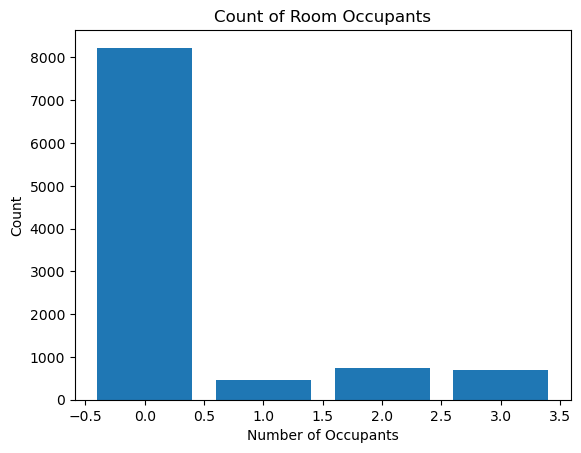

In [8]:
import matplotlib.pyplot as plt

# Count occurrences of each number of occupants
counts = occupancy['Room_Occupancy_Count'].value_counts().sort_index()

# Create bar plot
plt.bar(counts.index, counts.values)
plt.xlabel('Number of Occupants')
plt.ylabel('Count')
plt.title('Count of Room Occupants')
plt.show()

#### Correlation Heatmap

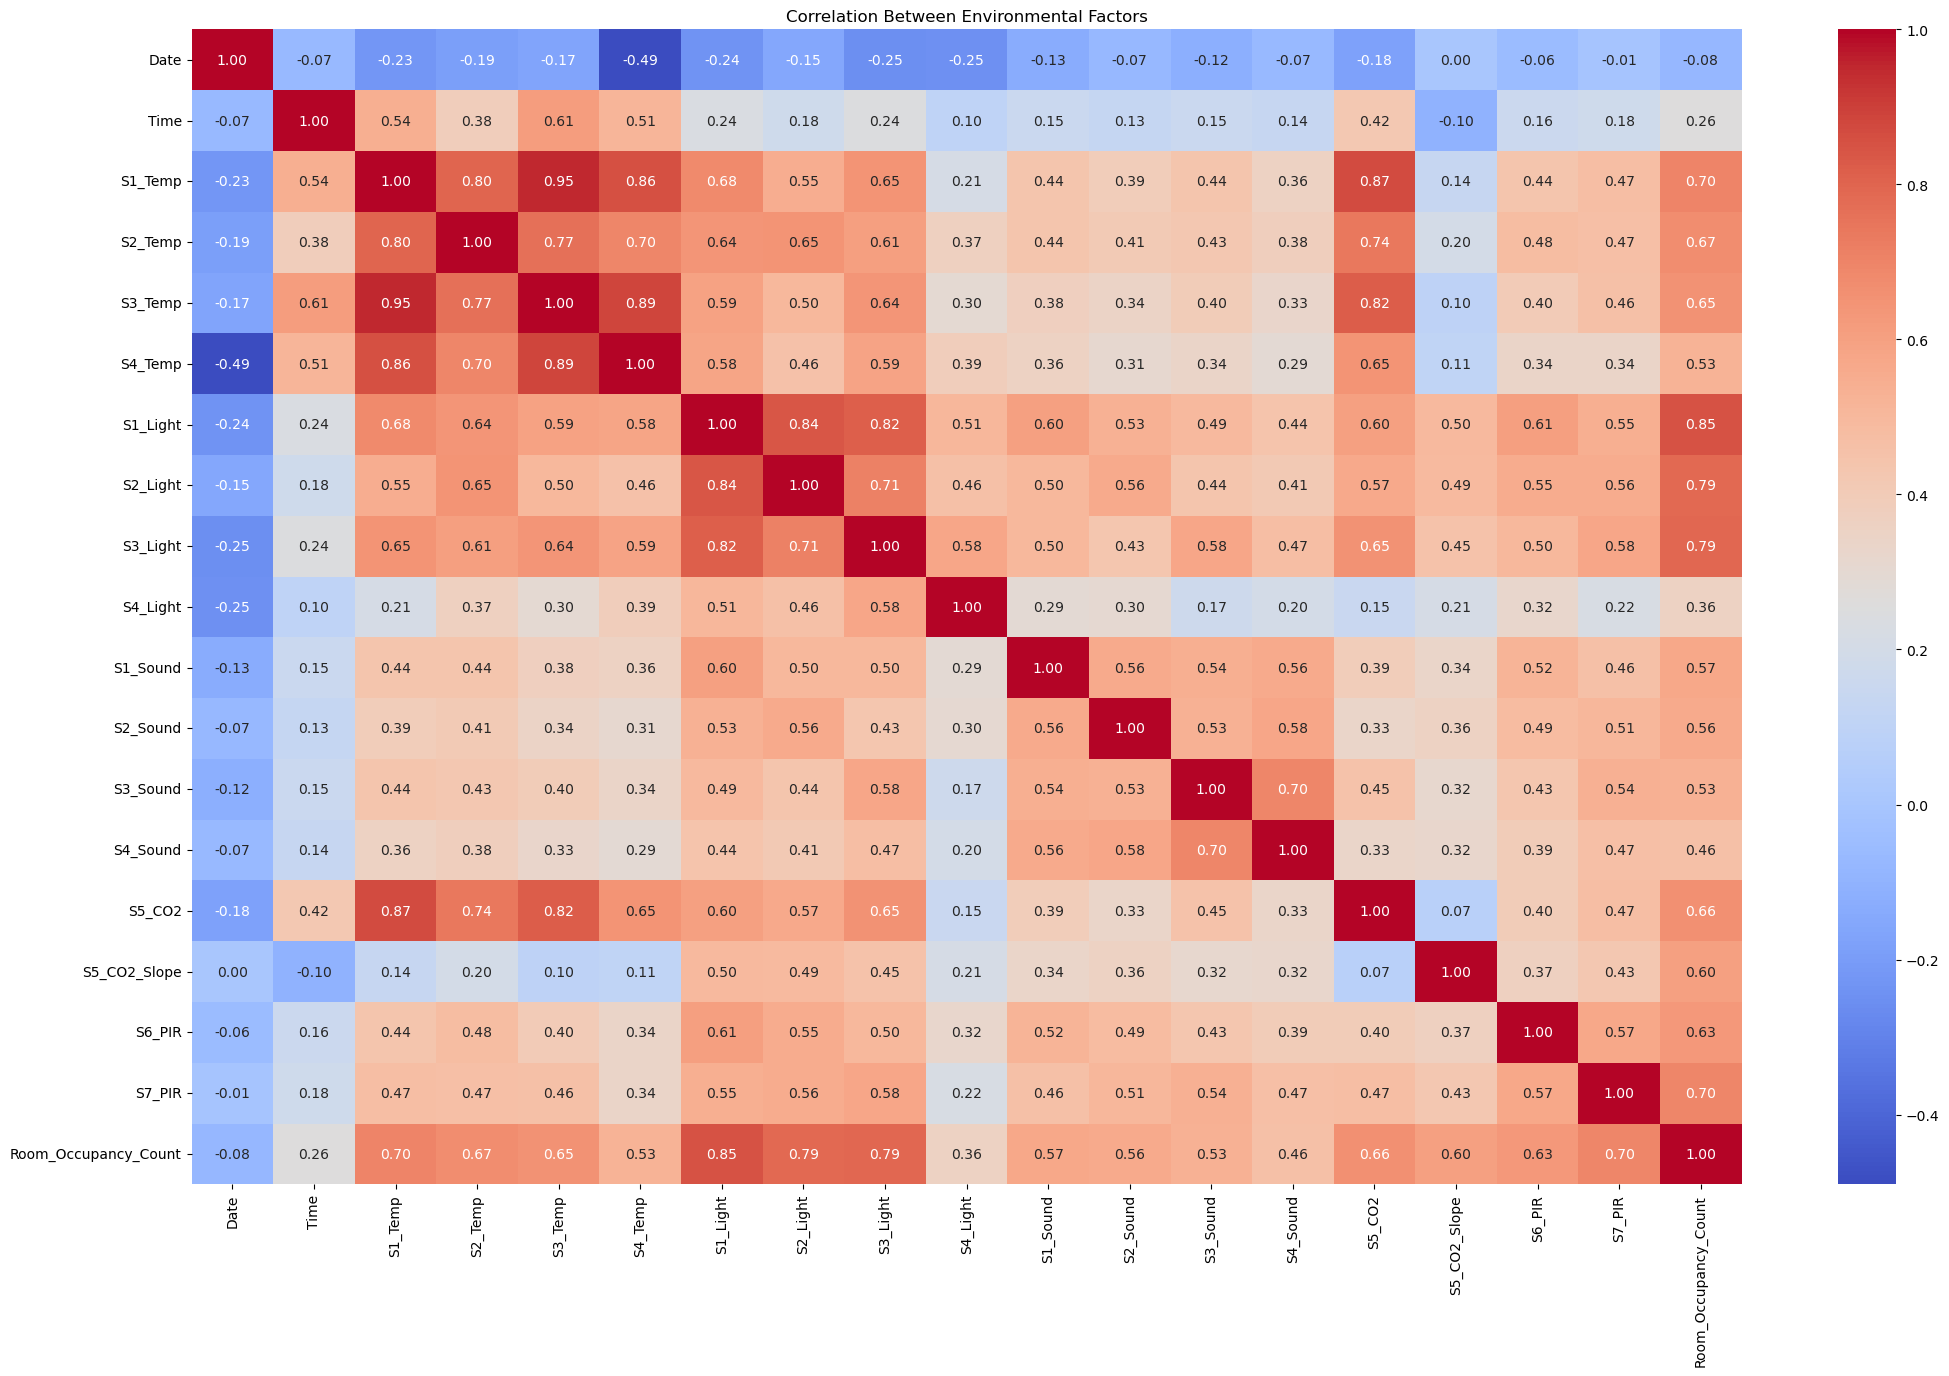

In [10]:
corr_matx = occupancy.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_matx, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Environmental Factors")
plt.show()

#### Dropping columns with low correlation

In [12]:
#drop Date --> has low correlation with all other features
occupancy = occupancy.drop(columns=['Date'])
occupancy.info()
occupancy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Time                  10129 non-null  datetime64[ns]
 1   S1_Temp               10129 non-null  float64       
 2   S2_Temp               10129 non-null  float64       
 3   S3_Temp               10129 non-null  float64       
 4   S4_Temp               10129 non-null  float64       
 5   S1_Light              10129 non-null  int64         
 6   S2_Light              10129 non-null  int64         
 7   S3_Light              10129 non-null  int64         
 8   S4_Light              10129 non-null  int64         
 9   S1_Sound              10129 non-null  float64       
 10  S2_Sound              10129 non-null  float64       
 11  S3_Sound              10129 non-null  float64       
 12  S4_Sound              10129 non-null  float64       
 13  S5_CO2          

,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,1900-01-01 12:00:33.714779136,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
min,1900-01-01 00:00:28,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,1900-01-01 05:27:45,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,1900-01-01 12:06:49,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,1900-01-01 18:31:15,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,1900-01-01 23:59:58,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000
std,NaN,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633


#### Pairplots for Correlated Groups

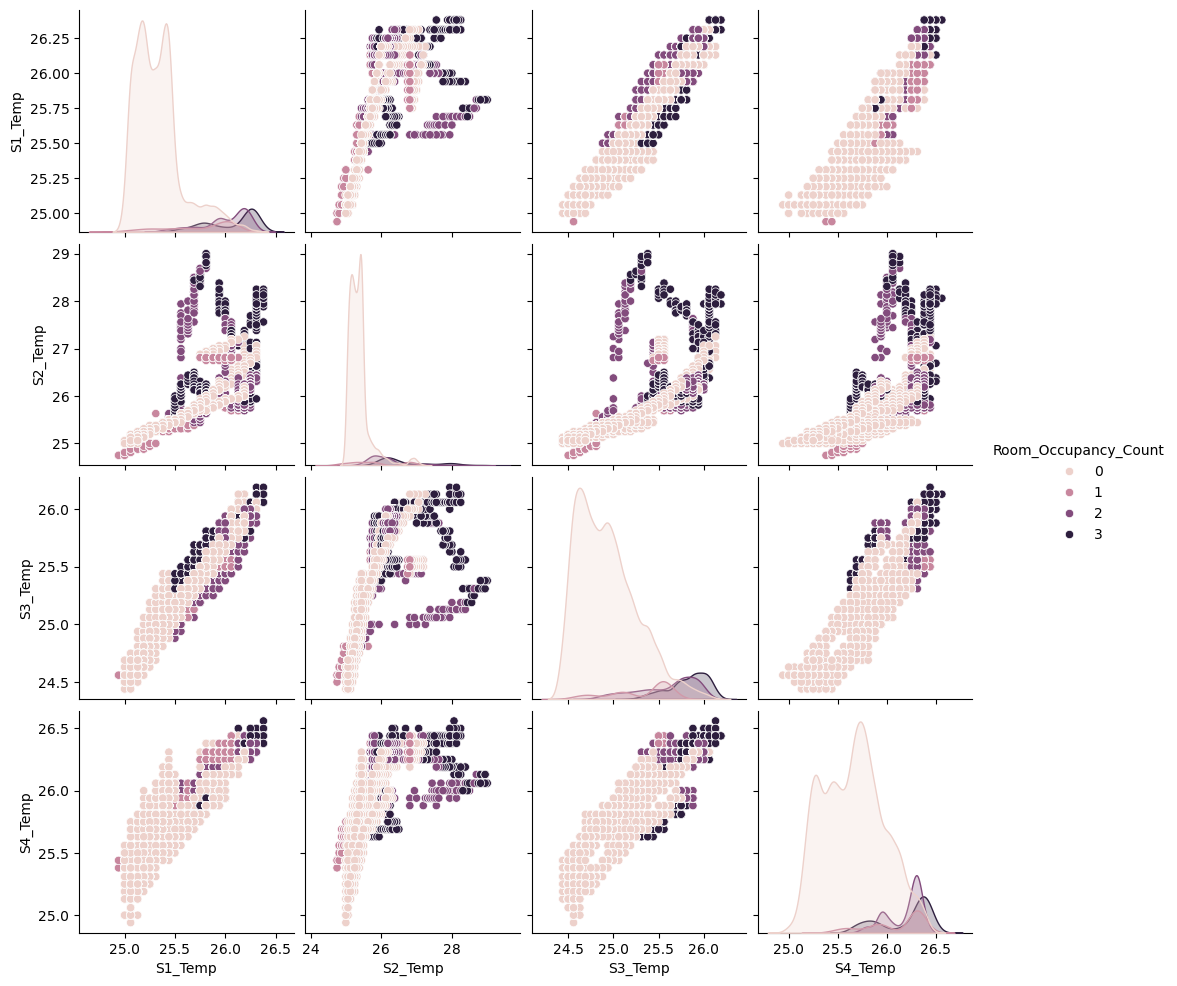

In [14]:
Temp_subset_df = occupancy[["S1_Temp", "S2_Temp", "S3_Temp", "S4_Temp", "Room_Occupancy_Count"]]
sns.pairplot(Temp_subset_df, hue="Room_Occupancy_Count")

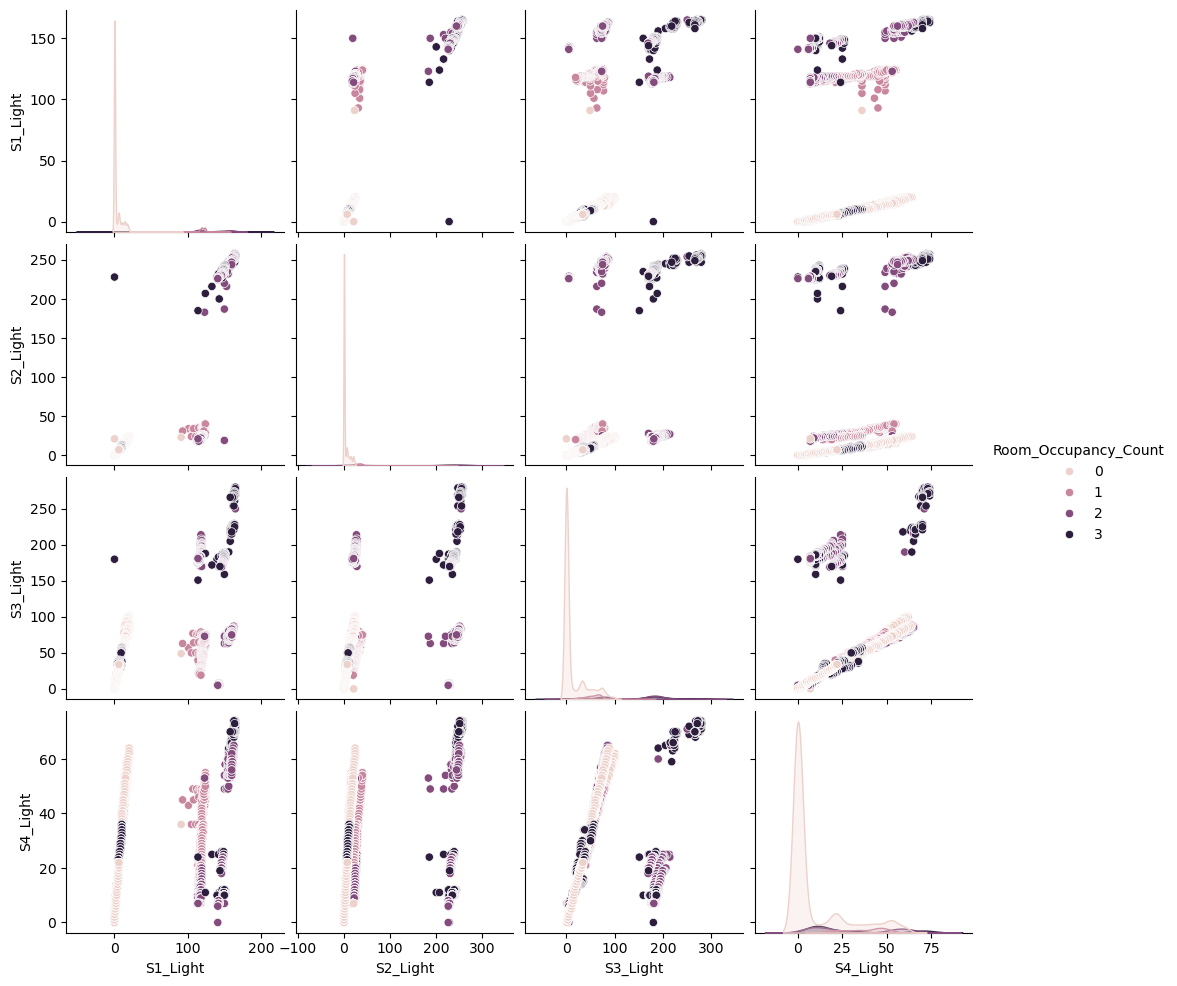

In [15]:
Light_subset_df = occupancy[["S1_Light", "S2_Light", "S3_Light", "S4_Light","Room_Occupancy_Count"]]
sns.pairplot(Light_subset_df, hue="Room_Occupancy_Count")

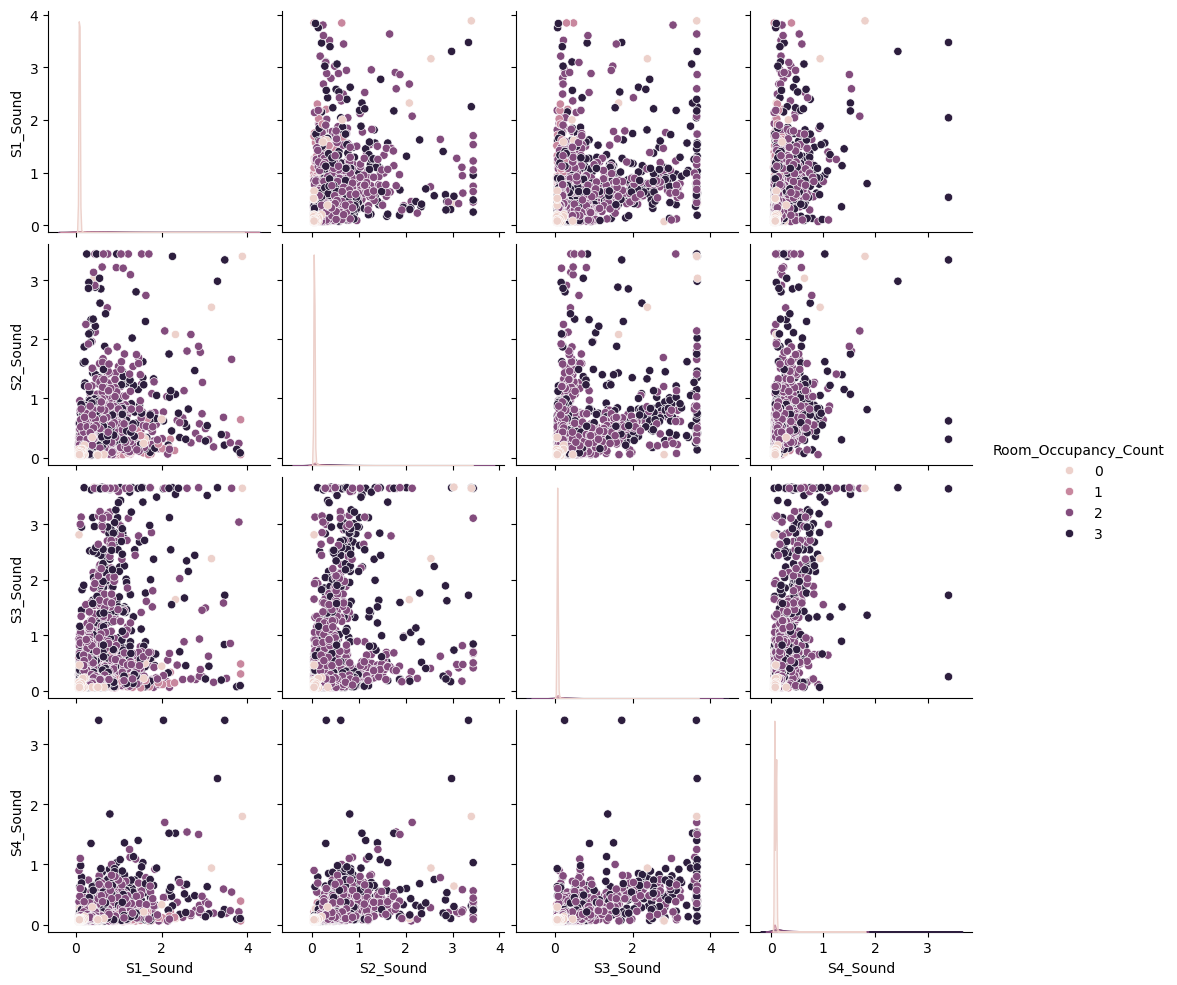

In [16]:
Sound_subset_df = occupancy[["S1_Sound", "S2_Sound", "S3_Sound", "S4_Sound", "Room_Occupancy_Count"]]
sns.pairplot(Sound_subset_df, hue="Room_Occupancy_Count")

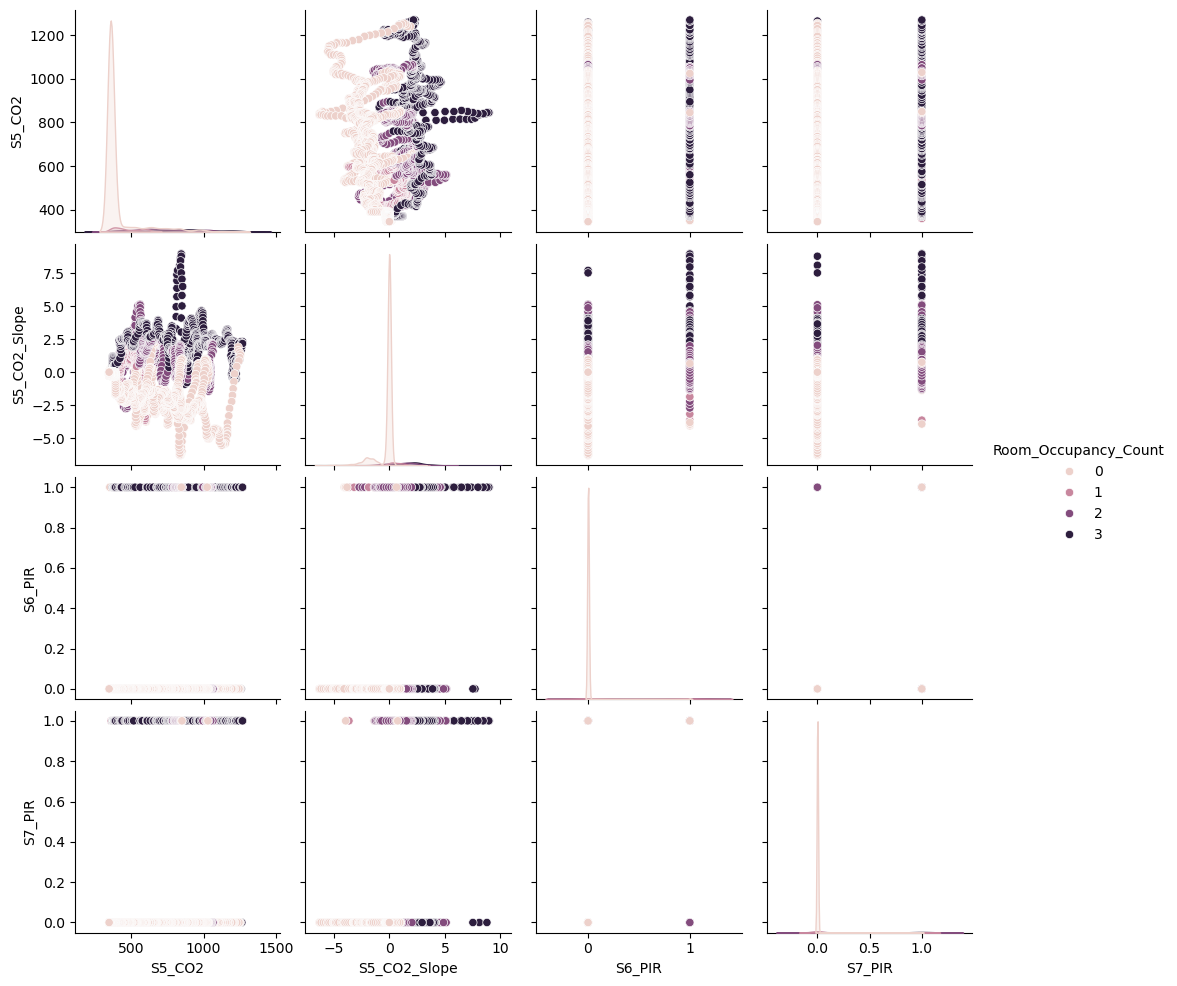

In [17]:
CO2PIR_subset_df = occupancy[["S5_CO2", "S5_CO2_Slope", "S6_PIR", "S7_PIR","Room_Occupancy_Count"]]
sns.pairplot(CO2PIR_subset_df, hue="Room_Occupancy_Count")

#### Changing time values to numerical values, dropping Time column

In [22]:
occupancy['hour'] = occupancy['Time'].dt.hour
occupancy['hour_sin'] = np.sin(2 * np.pi * occupancy['hour'] / 24)
occupancy['hour_cos'] = np.cos(2 * np.pi * occupancy['hour'] / 24)
occupancy = occupancy.drop(columns=['Time'])

#### KNN modeling

In [24]:
from sklearn.model_selection import train_test_split
X = occupancy.drop('Room_Occupancy_Count', axis=1).values
y = occupancy['Room_Occupancy_Count'].values

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)

print(f"X_trn shape: {X_trn.shape}")
print(f"X_tst shape: {X_tst.shape}")
print(f"y_trn shape: {y_trn.shape}")
print(f"y_tst shape: {y_tst.shape}")

X_trn shape: (8103, 19)
X_tst shape: (2026, 19)
y_trn shape: (8103,)
y_tst shape: (2026,)


In [26]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
X_trn = sclr.fit_transform(X_trn)
X_tst = sclr.transform(X_tst)
print(f"X_trn shape: {X_trn.shape}")
print(f"X_tst shape: {X_tst.shape}")


X_trn shape: (8103, 19)
X_tst shape: (2026, 19)


Cross Validation: 1, [0.99136336 0.98766194 0.99136336 0.99382716 0.99197531]
Classification Report: 1,               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.98      0.99      0.99       103
           2       0.95      0.96      0.96       164
           3       0.95      0.95      0.95       140

    accuracy                           0.99      2026
   macro avg       0.97      0.98      0.97      2026
weighted avg       0.99      0.99      0.99      2026



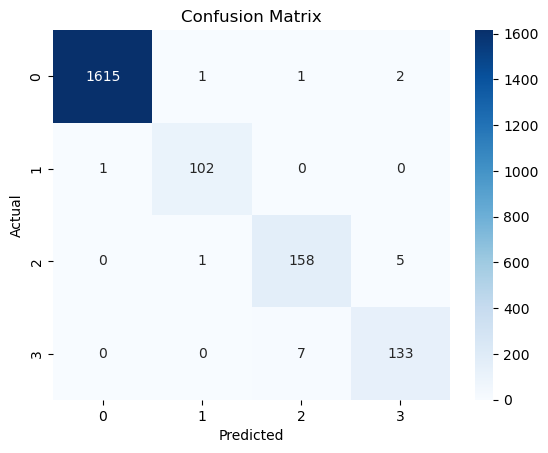

Cross Validation: 3, [0.99074645 0.98951265 0.99259716 0.99506173 0.99074074]
Classification Report: 3,               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.98      0.99      0.99       103
           2       0.95      0.96      0.95       164
           3       0.95      0.96      0.95       140

    accuracy                           0.99      2026
   macro avg       0.97      0.98      0.97      2026
weighted avg       0.99      0.99      0.99      2026



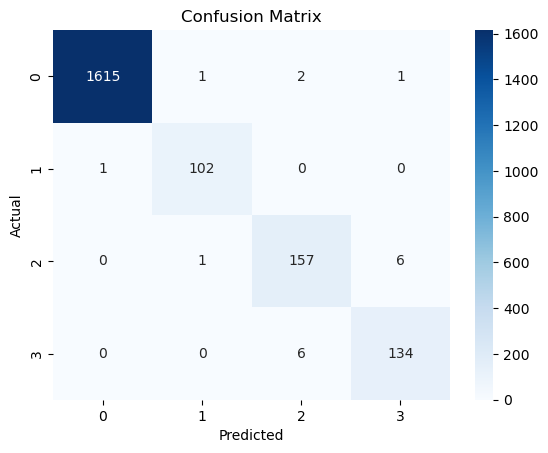

Cross Validation: 5, [0.99074645 0.99074645 0.99074645 0.99506173 0.99012346]
Classification Report: 5,               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      0.99      0.99       103
           2       0.95      0.96      0.96       164
           3       0.94      0.96      0.95       140

    accuracy                           0.99      2026
   macro avg       0.97      0.98      0.97      2026
weighted avg       0.99      0.99      0.99      2026



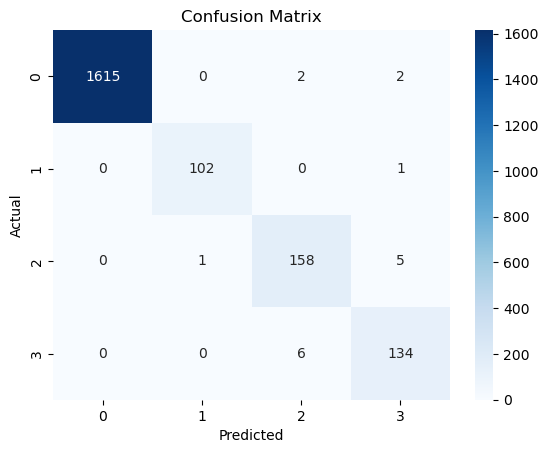

Cross Validation: 7, [0.98951265 0.98889574 0.98951265 0.99444444 0.98950617]
Classification Report: 7,               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      0.98      0.99       103
           2       0.96      0.97      0.96       164
           3       0.93      0.95      0.94       140

    accuracy                           0.99      2026
   macro avg       0.97      0.97      0.97      2026
weighted avg       0.99      0.99      0.99      2026



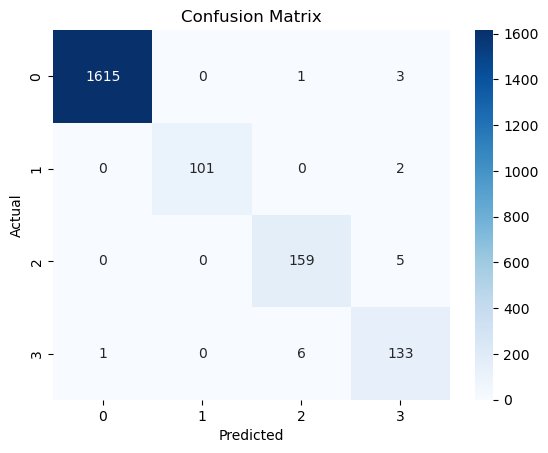

Cross Validation: 9, [0.99012955 0.98827884 0.98951265 0.99259259 0.98765432]
Classification Report: 9,               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      0.99      1.00       103
           2       0.97      0.96      0.96       164
           3       0.92      0.96      0.94       140

    accuracy                           0.99      2026
   macro avg       0.97      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026



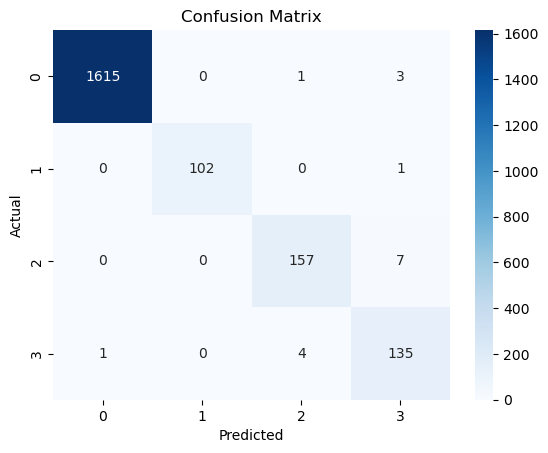

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

cv_scores=[]

for k in [1,3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')

    cv = StratifiedKFold(n_splits=5)
    scores = cross_val_score(knn, X_trn, y_trn, cv=cv)
    cv_scores.append(scores.mean())
    print(f"Cross Validation: {k}, {scores}")

    knn.fit(X_trn, y_trn)
    y_pred = knn.predict(X_tst)
    print(f"Classification Report: {k}, {classification_report(y_tst, y_pred)}")

    con_mat = confusion_matrix(y_true=y_tst, y_pred=y_pred)
    sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
